# Sales Data Analysis for a Retail Store

## Step 1: Load Dataset and Understand its Structure

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from src.data_processing import load_and_clean_data

In [2]:
file_path = os.path.join('..', 'data', 'supermarket.csv')
df = load_and_clean_data(file_path)

In [3]:
# Check if the data was loaded successfully before proceeding
if df is not None:
    print("Data loaded and cleaned successfully. First 5 rows:")
    print(df.head())
else:
    print("Could not load data.")

Data loaded and cleaned successfully. First 5 rows:
  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [4]:
# Chect Data Types and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
# Statistical Summary of dataset
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


## Step 2: Clean and Prepare the Data

In [6]:
# Convert 'Order Date' to DateTime Format
# To analyze trends over time, convert Order Date to datetime.
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [7]:
# Create new columns for year, month, day, and day of week.
# Extract year, month, day, and day of week
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.day_name()

In [8]:
# Create New Features
# Add a Profit Margin column (Profit / Sales) to analyze profitability.
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

In [9]:
# Check unique values for consistency
print(df['Region'].unique())
print(df['Category'].unique())

['North' 'South' 'West' 'Central' 'East']
['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']


In [10]:
# Handle Outliers (Optional)
# Identify outliers using IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]  
print(f"Outliers in Sales: {len(outliers)} rows")

Outliers in Sales: 0 rows


In [11]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year,Order Month,Order Day,Order Weekday,Profit Margin (%)
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017.0,November,8.0,Wednesday,32.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017.0,November,8.0,Wednesday,20.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017.0,June,12.0,Monday,7.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016.0,October,11.0,Tuesday,10.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016.0,October,11.0,Tuesday,39.0


## Step 3: Exploratory Data Analysis (EDA)

In [12]:
# Group sales by 'Category' 
category_sales = df.groupby('Category')['Sales'].sum().reset_index()  

df.groupby('Category')

In [13]:
# Sort by total sales 
category_sales = category_sales.sort_values(by='Sales', ascending=False)

C:\Users\Gireesh\AppData\Local\Temp\ipykernel_13796\1147439684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Category', data=category_sales, palette='viridis')


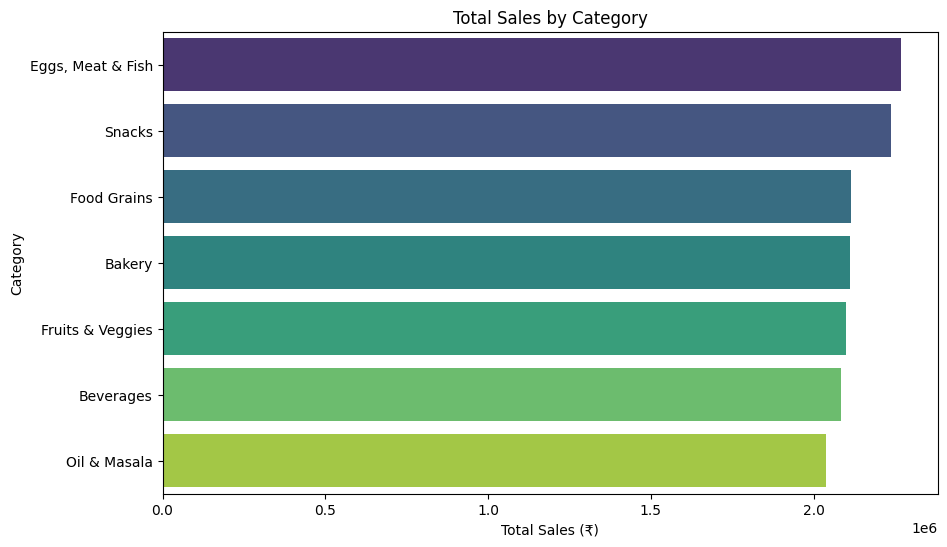

In [14]:
# Visualize with a bar chart
plt.figure(figsize=(10, 6))  
sns.barplot(x='Sales', y='Category', data=category_sales, palette='viridis')  
plt.title("Total Sales by Category")  
plt.xlabel("Total Sales (₹)")  
plt.ylabel("Category")  
plt.show() 

In [15]:
# Calculate average profit margin by category
category_profit_margin = df.groupby('Category')['Profit Margin (%)'].mean().reset_index() 

In [16]:
# Sort by profit margin  
category_profit_margin = category_profit_margin.sort_values(by='Profit Margin (%)', ascending=False) 

C:\Users\Gireesh\AppData\Local\Temp\ipykernel_13796\264612040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit Margin (%)', y='Category', data=category_profit_margin, palette='coolwarm')


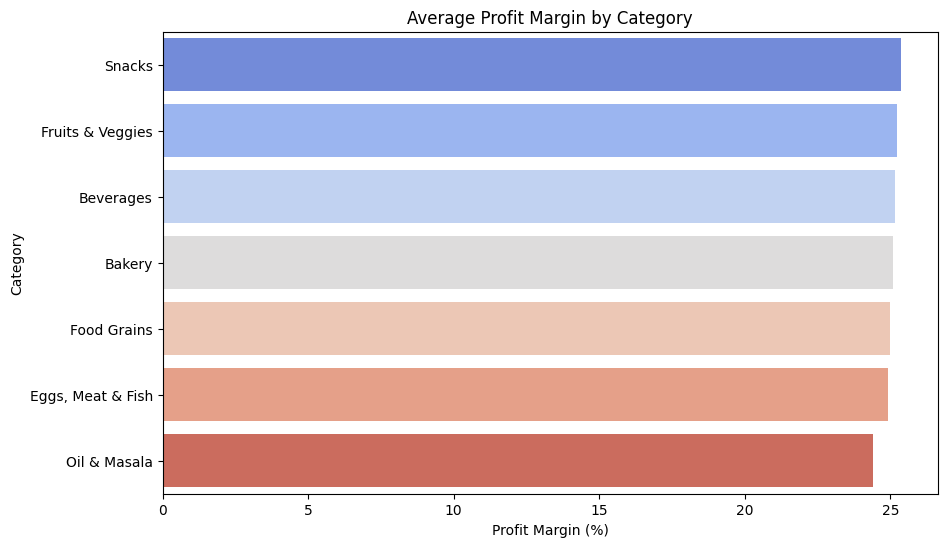

In [17]:
# Visualize with a bar chart  
plt.figure(figsize=(10, 6))  
sns.barplot(x='Profit Margin (%)', y='Category', data=category_profit_margin, palette='coolwarm')  
plt.title("Average Profit Margin by Category")  
plt.xlabel("Profit Margin (%)")  
plt.ylabel("Category")  
plt.show()  

In [18]:
# Aggregate sales by month 
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index() 

In [19]:
# Order months chronologically  
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']  
monthly_sales['Order Month'] = pd.Categorical(monthly_sales['Order Month'], categories=month_order, ordered=True)  
monthly_sales = monthly_sales.sort_values('Order Month') 

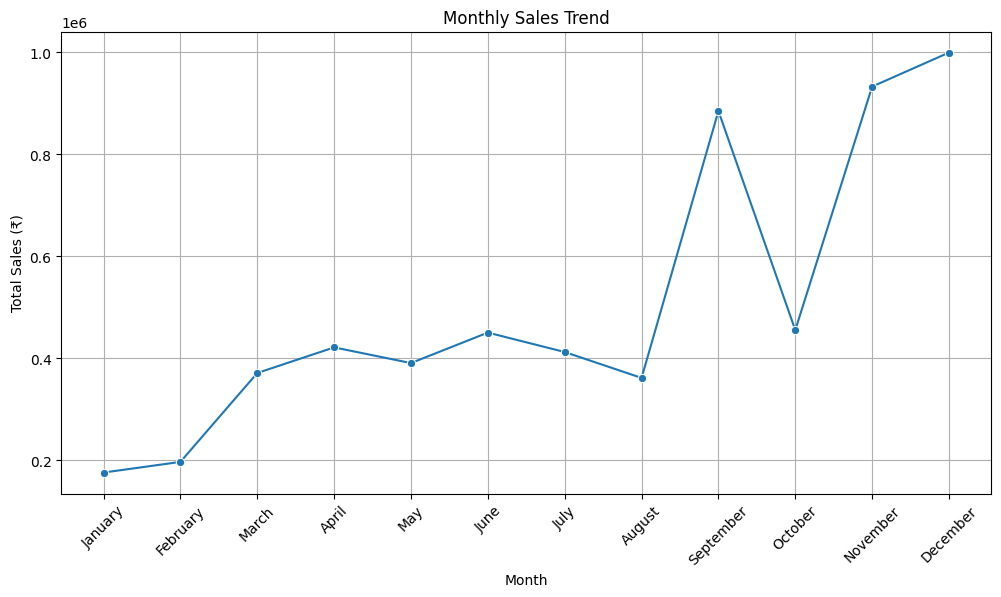

In [20]:
# Plot line chart
plt.figure(figsize=(12, 6))  
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o')  
plt.title("Monthly Sales Trend")  
plt.xlabel("Month")  
plt.ylabel("Total Sales (₹)")  
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()  

In [21]:
# Group sales by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()  

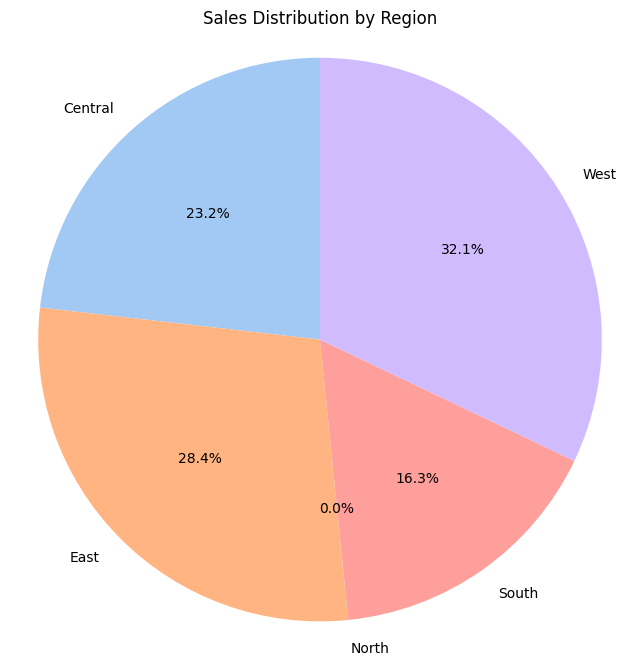

In [22]:
# Visualize with a pie chart  
plt.figure(figsize=(8, 8))  
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))  
plt.title("Sales Distribution by Region")  
plt.axis('equal')  
plt.show()

## Step 4: Analyze Subcategories and Customer Behaviour

In [23]:
# Group sales by 'Sub Category' within the top category
top_category = "Egg, meat & fish"  
subcategory_sales = df[df['Category'] == top_category].groupby('Sub Category')['Sales'].sum().reset_index()

C:\Users\Gireesh\AppData\Local\Temp\ipykernel_13796\2391804161.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Sub Category', data=subcategory_sales, palette='plasma')


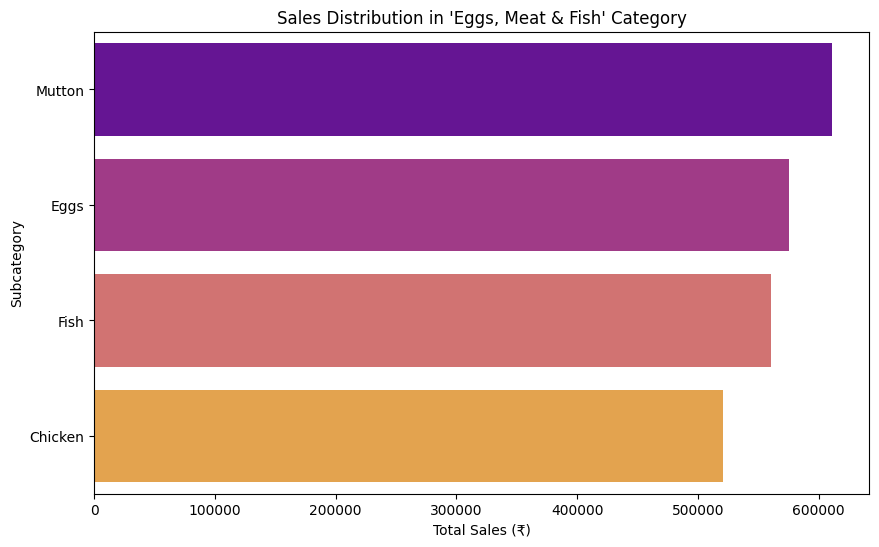

In [24]:
top_category = "Eggs, Meat & Fish"  

# Filter data for the top category
subcategory_sales = df[df['Category'] == top_category].groupby('Sub Category')['Sales'].sum().reset_index()

# Check if the filtered DataFrame is empty
if subcategory_sales.empty:
    print(f"No data found for category: {top_category}. Check the category name.")
else:
    # Proceed with sorting and visualization
    subcategory_sales = subcategory_sales.sort_values(by='Sales', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Sales', y='Sub Category', data=subcategory_sales, palette='plasma')
    plt.title(f"Sales Distribution in '{top_category}' Category")
    plt.xlabel("Total Sales (₹)")
    plt.ylabel("Subcategory")
    plt.show()

In [25]:
# Count unique orders per customer 
customer_orders = df.groupby('Customer Name')['Order ID'].count().reset_index()  
customer_orders.columns = ['Customer Name', 'Order Count']

In [26]:
# Categorize customers as "One-time" or "Repeat"
customer_orders['Customer Type'] = customer_orders['Order Count'].apply(lambda x: "Repeat" if x > 1 else "One-time") 

C:\Users\Gireesh\AppData\Local\Temp\ipykernel_13796\3284886915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Type', data=customer_orders, palette='Set2')


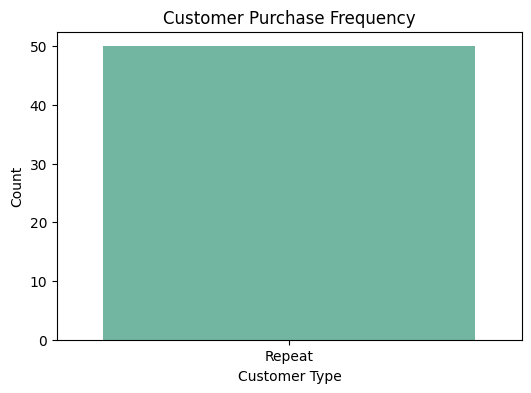

In [27]:
# Visualize distribution
plt.figure(figsize=(6, 4))  
sns.countplot(x='Customer Type', data=customer_orders, palette='Set2')  
plt.title("Customer Purchase Frequency")  
plt.xlabel("Customer Type")  
plt.ylabel("Count")  
plt.show()  

C:\Users\Gireesh\AppData\Local\Temp\ipykernel_13796\3429562824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Type', y='Sales', data=avg_sale_by_type, palette='magma')


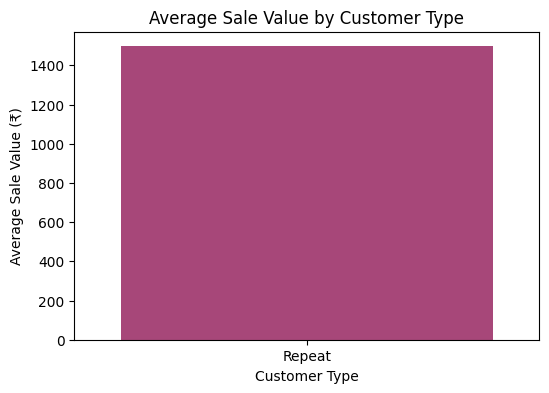

In [28]:
# Count unique orders per customer
customer_orders = df.groupby('Customer Name')['Order ID'].count().reset_index()
customer_orders.columns = ['Customer Name', 'Order Count']

# Categorize as "Repeat" or "One-time"
customer_orders['Customer Type'] = customer_orders['Order Count'].apply(lambda x: "Repeat" if x > 1 else "One-time")

# Merge back to original data
df = df.merge(customer_orders[['Customer Name', 'Customer Type']], on='Customer Name', how='left')

# Now calculate average sale value by customer type
avg_sale_by_type = df.groupby('Customer Type')['Sales'].mean().reset_index()

# Visualize
plt.figure(figsize=(6, 4))
sns.barplot(x='Customer Type', y='Sales', data=avg_sale_by_type, palette='magma')
plt.title("Average Sale Value by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Sale Value (₹)")
plt.show()

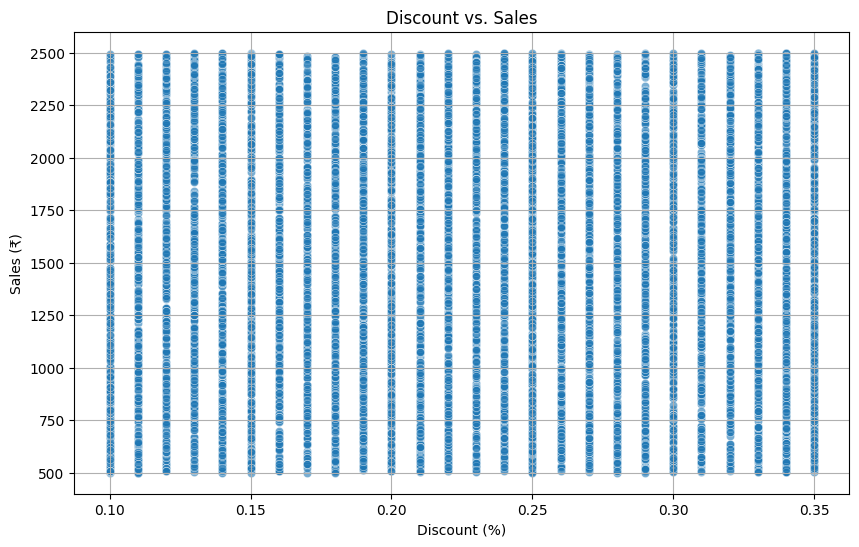

Correlation between Discount and Sales: -0.01


In [29]:
# Scatter plot of Discount vs. Sales
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='Discount', y='Sales', data=df, alpha=0.6)  
plt.title("Discount vs. Sales")  
plt.xlabel("Discount (%)")  
plt.ylabel("Sales (₹)")  
plt.grid(True)  
plt.show()  

# Calculate correlation  
correlation = df['Discount'].corr(df['Sales'])  
print(f"Correlation between Discount and Sales: {correlation:.2f}")  

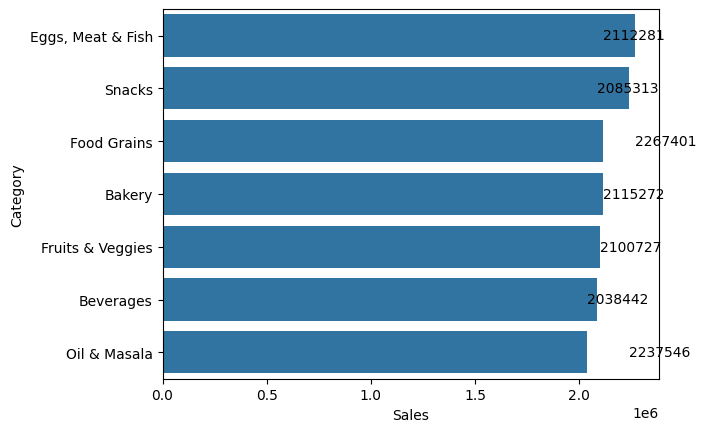

In [30]:
ax = sns.barplot(x='Sales', y='Category', data=category_sales)  
for index, row in category_sales.iterrows():  
    ax.text(row['Sales'] + 50, index, f'{row["Sales"]:.0f}', va='center')  # Add values to the right of bars  
plt.show()  

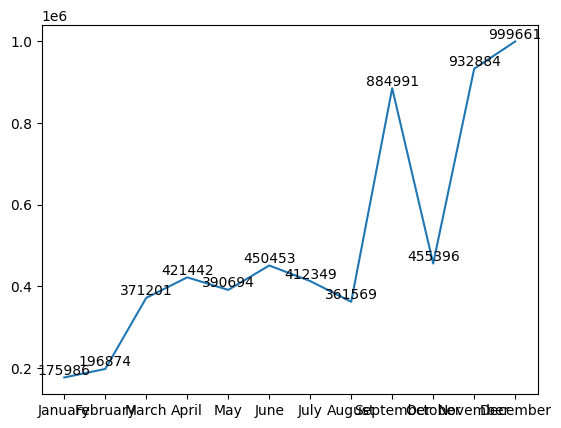

In [31]:
for x, y in zip(monthly_sales['Order Month'], monthly_sales['Sales']):  
    plt.text(x, y + 50, f'{y:.0f}', ha='center', va='bottom')  # Add values above each point  
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales'])  
plt.show()  

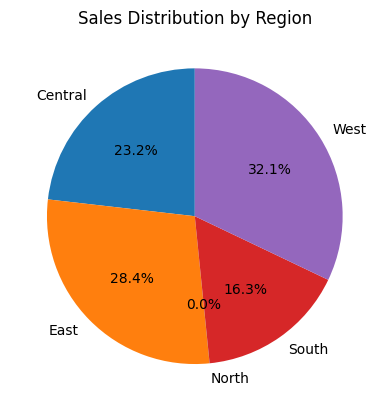

In [32]:
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90)  
plt.title("Sales Distribution by Region")  
plt.show()  

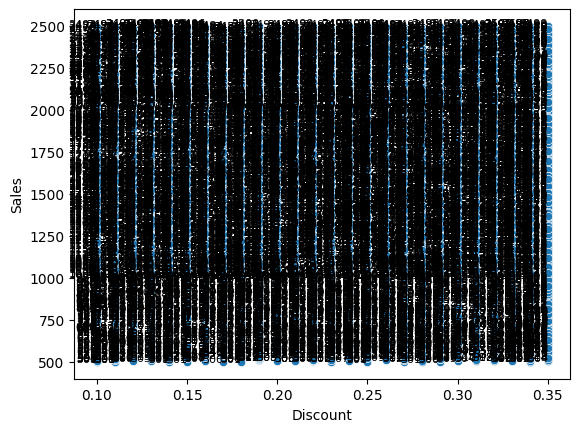

In [33]:
for i, row in df.iterrows():  
    plt.text(row['Discount'], row['Sales'], f'{row["Sales"]:.0f}', fontsize=8, ha='right')  
sns.scatterplot(x='Discount', y='Sales', data=df)  
plt.show()  

In [34]:
print("Top 3 Subcategories by Sales:")  
print(subcategory_sales.head(3))  # Show top 3 subcategories  

print("\nProfit Margin by Category:")  
print(category_profit_margin.sort_values(by='Profit Margin (%)', ascending=False))

Top 3 Subcategories by Sales:
  Sub Category   Sales
3       Mutton  611200
1         Eggs  575156
2         Fish  560548

Profit Margin by Category:
            Category  Profit Margin (%)
6             Snacks          25.349406
4   Fruits & Veggies          25.241185
1          Beverages          25.142857
0             Bakery          25.094126
3        Food Grains          24.991416
2  Eggs, Meat & Fish          24.902013
5       Oil & Masala          24.398971
